# TP DATA MINING  
## Bastien CHABAL - 11506213  
## Valentin CHAFFRAIX - 11506953  
## Julien VERMOREL - 11502541  

# _________
# Algorithme d'échantillonnage des motifs fréquents

## Définitions des fonctions

In [2]:
import numpy as np
import random

In [3]:
def import_data(filename):
    data = np.loadtxt(filename, dtype=int)
    return data

In [4]:
def gen_motifs(data):
    motifs = []
    for i in range (0, len(data)):
        for j in range (0, len(data[i])):
            if data[i][j] not in motifs:
                motifs.append(data[i][j])
    motifs.sort()
    return motifs

gen_motifs va renvoyer la liste de tous les éléments uniques que contient le fichier de données

In [5]:
def mat_b(data, motifs):
    mx = [] # Matrice binaire
    for i in range (0, len(data)):
        temp = []
        for j in range(0, len(motifs)):
            if motifs[j] in data[i]:
                temp.append(True)
            else:
                temp.append(False)
        mx.append(temp)
    return mx

mat_b va créer une matrice binaire adaptée au nombre d'éléments uniques

In [6]:
def weight_f(data):
    weight = []
    for i in range(0, len(data)):
        w = np.power(2, len(data[i])) - 1
        weight.append(w)
    return weight

weight_f va associer les poids en utilisant la formule de l'énoncé

In [7]:
def search_sample(data, weight):

    # Tirage d'itemset aléatoire
    w_total = np.sum(weight) #Génération du poids total
    tirage = random.randint(0,w_total) #Génération nombre aléatoire entre 0 et poids total
    i=1
    while tirage>np.sum(weight[:i]): #On cherche à quelle transaction correspond le chiffre aléatoire
        i = i+1

    transac = i-1
    
    #Création du sous-itemset de l'itemset aléatoire
    s_item = []
    for i in range (0, len(data[transac])):
        add = random.randint(0,1)
        if add>0.5:
            s_item.append(data[transac][i])
    
    #Recherche fréquence du sous-itemset
    freq = 0

    for i in range(0,len(data)):
        for j in range (0,len(s_item)):
            if s_item[j] in data[i]:
                if j == len(s_item)-1:
                    freq+=1
            else:
                break
    return freq

search_sample va rechercher les motifs fréquents, elle procède en plusieurs étapes :  
- Elle va tirer un itemset aléatoire
- Elle va créer un sous itemset de cet itemset de manière aléatoire 
- Elle recherche si ce sous itemset est fréquent dans l'ensemble des données et retourne sa fréquence 

In [8]:
def search_samples(data, weight, it):

    for i in range(0,it):
        # Tirage d'itemset aléatoire
        w_total = np.sum(weight) #Génération du poids total
        tirage = random.randint(0,w_total) #Génération nombre aléatoire entre 0 et poids total
        i=1
        while tirage>np.sum(weight[:i]): #On cherche à quelle transaction correspond le chiffre aléatoire
            i = i+1

        transac = i-1

        #Création du sous-itemset de l'itemset aléatoire
        s_item = []
        for i in range (0, len(data[transac])):
            add = random.randint(0,1)
            if add>0.5:
                s_item.append(data[transac][i])

        #Recherche fréquence du sous-itemset
        freq = 0

        for i in range(0,len(data)):
            for j in range (0,len(s_item)):
                if s_item[j] in data[i]:
                    if j == len(s_item)-1:
                        freq+=1
                else:
                    break
        print(s_item,'\n Fréquence : ', freq)

search_samples fonctionne de la même manière que search_sample, sauf qu'elle répète l'opération un nombre it d'itérations (passé en paramètres)

In [9]:
data = import_data('mushroom.dat')
motifs = gen_motifs(data)
mat_b = mat_b(data, motifs)
weight = weight_f(data)

Ici on importe les données de mushrooms.dat dans data  
Puis on regarde le nombre de "singletons" différents il y a dans ce jeu de données (119 pour mushroom)  
On crée une matrice binaire à partir de ce résultat  
On applique les poids appropriés  

In [10]:
freq = search_sample(data,weight)

In [11]:
print(freq)

72


## Question 1 : Exemple de motifs fréquents et leur fréquence 

In [12]:
search_samples(data,weight,10)

[9, 32, 34, 36, 38, 48, 66, 76, 86, 94, 102] 
 Fréquence :  72
[2, 6, 10, 23, 28, 34, 53, 59, 85, 90, 93, 99, 111, 116] 
 Fréquence :  108
[2, 9, 23, 26, 39, 59, 67, 85, 86, 90, 93] 
 Fréquence :  128
[2, 6, 23, 34, 53, 56, 63, 78, 86, 90, 116] 
 Fréquence :  288
[1, 7, 24, 31, 34, 36, 48, 53, 66, 90, 102, 110, 116] 
 Fréquence :  32
[1, 11, 24, 34, 36, 39, 71, 85, 86, 90, 95, 111, 117] 
 Fréquence :  36
[1, 3, 13, 38, 53, 58, 66, 85, 90] 
 Fréquence :  144
[16, 23, 28, 39, 41, 59, 63, 67, 77, 86, 93, 99, 111] 
 Fréquence :  4
[3, 10, 28, 34, 53, 59, 63, 85, 90, 93, 111, 116] 
 Fréquence :  216
[14, 24, 45, 52, 85, 86, 90, 95, 110] 
 Fréquence :  108


# Question 2 : Algorithme d'échantillonnage basé sur l'aire

In [14]:
def findsubsets(s, n): 
    return list(itertools.combinations(s, n)) 

In [15]:
class DataSet:
    def __init__(self, path):
        self.importFile(path)
    def importFile(self, path):
        f = open(path, "r")
        line = f.readline()
        lines = []
        while line != "":
            line = line.rstrip().split(" ")
            line = list(map(int, line))
            lines.append(set(line))
            line = f.readline()

        self.data = lines

    def initWeightsFreq(self):
        weights = []
        sumweights = 0
        for t in self.data:
            weight = 2**len(t)
            sumweights += weight
            weights.append(weight)
        self.weights = weights
        self.sumweights = sumweights
    def initWeightsArea(self):
        weights = []
        sumweights = 0
        for t in self.data:
            D_size = len(t)
            weight = D_size * (2**D_size - 1)
            sumweights += weight
            weights.append(weight)
        self.weights = weights
        self.sumweights = sumweights

    def samplePatternFreq(self):
        tirage = random.randint(0,self.sumweights)
        sumprogress = 0
        for i in range(len(self.data)):
            t = self.data[i]
            sumprogress += self.weights[i]
            if(sumprogress>=tirage):
                break
        pattern = []
        for i in range(len(t)):
            tirage = random.random()
            if(tirage<0.5):
                pattern.append(list(t)[i])
        pattern = set(pattern)
        return pattern

    def samplePatternArea(self):
        tirage = random.randint(0,self.sumweights)
        sumprogress = 0
        for i in range(len(self.data)):
            t = self.data[i]
            sumprogress += self.weights[i]
            if(sumprogress>=tirage):
                break
        D_size = len(t)
        # tirage de k
        total = (D_size * (D_size + 1))/2
        tirage = random.randint(1,total)
        sumprogress = 0
        for i in range(D_size+1):
            sumprogress += i
            if(sumprogress>=tirage):
                k = i
                break
        pattern = set(random.sample(t,k))
        # freq = 0
        # for t in self.data:
            # if(pattern.issubset(t)):
                # freq +=1
        # return (pattern, freq*len(pattern))
        return pattern

    def getRealisationsFreq(self, n):
        self.initWeightsFreq()
        patterns = []
        c = 0
        while c<n:
            p = self.samplePatternFreq()
            if(p not in patterns):
                c += 1
                patterns.append(p)       
        patterns_freq = []
        for pattern in patterns:
            freq = 0
            for t in self.data:
                if(pattern.issubset(t)):
                    freq +=1
            patterns_freq.append((pattern, freq))
        return patterns_freq

    def getRealisationsArea(self, n):
        self.initWeightsArea()
        patterns = []
        c = 0
        while c<n:
            p = self.samplePatternArea()
            if(p not in patterns):
                c += 1
                patterns.append(p)       
        patterns_area = []
        for pattern in patterns:
            freq = 0
            for t in self.data:
                if(pattern.issubset(t)):
                    freq +=1
            patterns_area.append((pattern, freq*len(pattern)))
        return patterns_area
    def patternSimilarity(self,patterns):
        n = len(patterns)
        sumprogress = 0
        c = 0
        for i in range(0, n):
            for j in range(i+1, n):
                intersection = len(patterns[i][0].intersection(patterns[j][0]))
                union = len(patterns[i][0].union(patterns[j][0]))
                #indice de jaccard
                sumprogress += float(intersection)/float(union)
                c += 1
        #moyenne des indices de jaccard
        return sumprogress/c


On crée ici une class DataSet qui contient les fonctions suivantes :
- importfile pour importer le fichier de données
- initWeightsArea pour intialiser les poids suivant la formule de l'aire
- samplePatternArea pour effectuer le tirage d'un itemset, de son sous itemset, et pour vérifier s'il est fréquent
- getRealisationsArea pour effectuer plusieurs simulations

In [16]:
D = DataSet("mushroom.dat")
D.initWeightsArea()
for i in range(500):
    p = D.samplePatternArea()
    print(p)

{1, 98, 34, 36, 67, 38, 6, 40, 10, 107, 76, 15, 52, 86, 90, 93}
{2, 6, 11, 16, 23, 28, 34, 36, 39, 43, 53, 56, 59, 63, 69, 78, 85, 86, 90, 93, 98, 111}
{56, 6, 117, 85, 24, 90, 29}
{2, 34, 36, 5, 98, 38, 40, 11, 76, 13, 113, 52, 85, 86, 24, 90, 59, 28, 63}
{1, 66, 34, 36, 101, 6, 10, 14, 80, 114, 52, 85, 86, 56, 24, 61, 95}
{1, 6, 10, 14, 24, 29, 34, 36, 39, 45, 52, 56, 66, 70, 80, 85, 86, 90, 95, 101, 111, 117}
{2, 3, 11, 13, 23, 28, 34, 36, 39, 46, 53, 56, 59, 63, 68, 85, 86, 90, 93, 98, 110}
{3, 36, 10, 77, 110, 53, 58}
{1, 6, 11, 16, 24, 29, 34, 36, 39, 43, 52, 56, 61, 66, 69, 77, 86, 90, 95, 101, 110, 117}
{1, 3, 11, 16, 24, 29, 34, 36, 39, 45, 56, 61, 66, 71, 80, 85, 86, 90, 95, 101, 111, 117}
{37, 6, 9, 45, 85, 86, 54, 24, 90, 59}
{2, 7, 10, 18, 23, 28, 34, 36, 39, 47, 52, 58, 59, 63, 67, 81, 85, 86, 91, 102, 112, 118}
{66, 36, 101, 71, 39, 10, 45, 111, 79, 29, 85, 86, 90, 61}
{35, 39, 9, 73, 105, 13, 83, 52, 119, 88, 90, 59, 28, 93}
{2, 34, 67, 102, 39, 76, 44, 16, 114, 52, 86,

# Question 3/4/5 : Résultat de 1000 réalisations

In [17]:
from matplotlib import pyplot as plt
import math
%matplotlib notebook

In [18]:
def showPlot(data, al=0, s=0):
    algos = np.array(["fréquence", "aire"])
    x = np.array([i for i in range(len(data))])
    y = np.array([row[1]/1000 for row in data])
    plt.figure()
    plt.hist(x, len(data)-1, weights=y, facecolor='green', alpha=0.75)
    plt.xlabel('Pattern indice')
    plt.ylabel('Frequency')
    plt.title('Echantillonage par {} de {}'.format(algos[al], sets[s]))
    plt.axis([0, len(freq)-1, 0, 1])
    plt.grid(True)
    plt.show()

Le block suivant pour afficher les graphes peut être long à s'éxecuter (10 minutes environ)
Si les graphes ne sont pas visibles dans la version que l'on a upload sur tomuss c'est qu'il nous restait trop peu de temps ppiur relancer le block avant minuit...

<IPython.core.display.Javascript object>


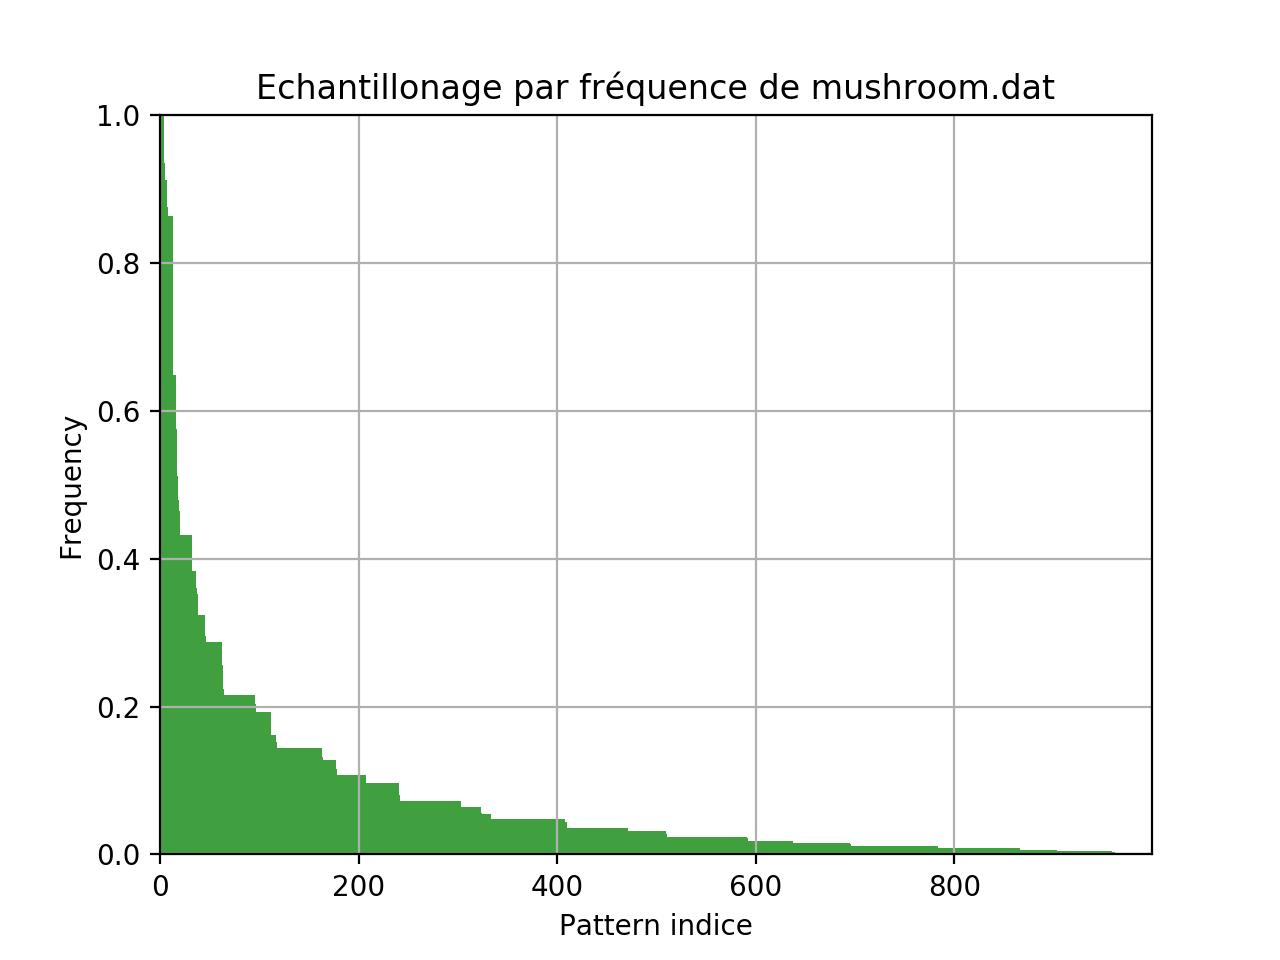

<IPython.core.display.Javascript object>


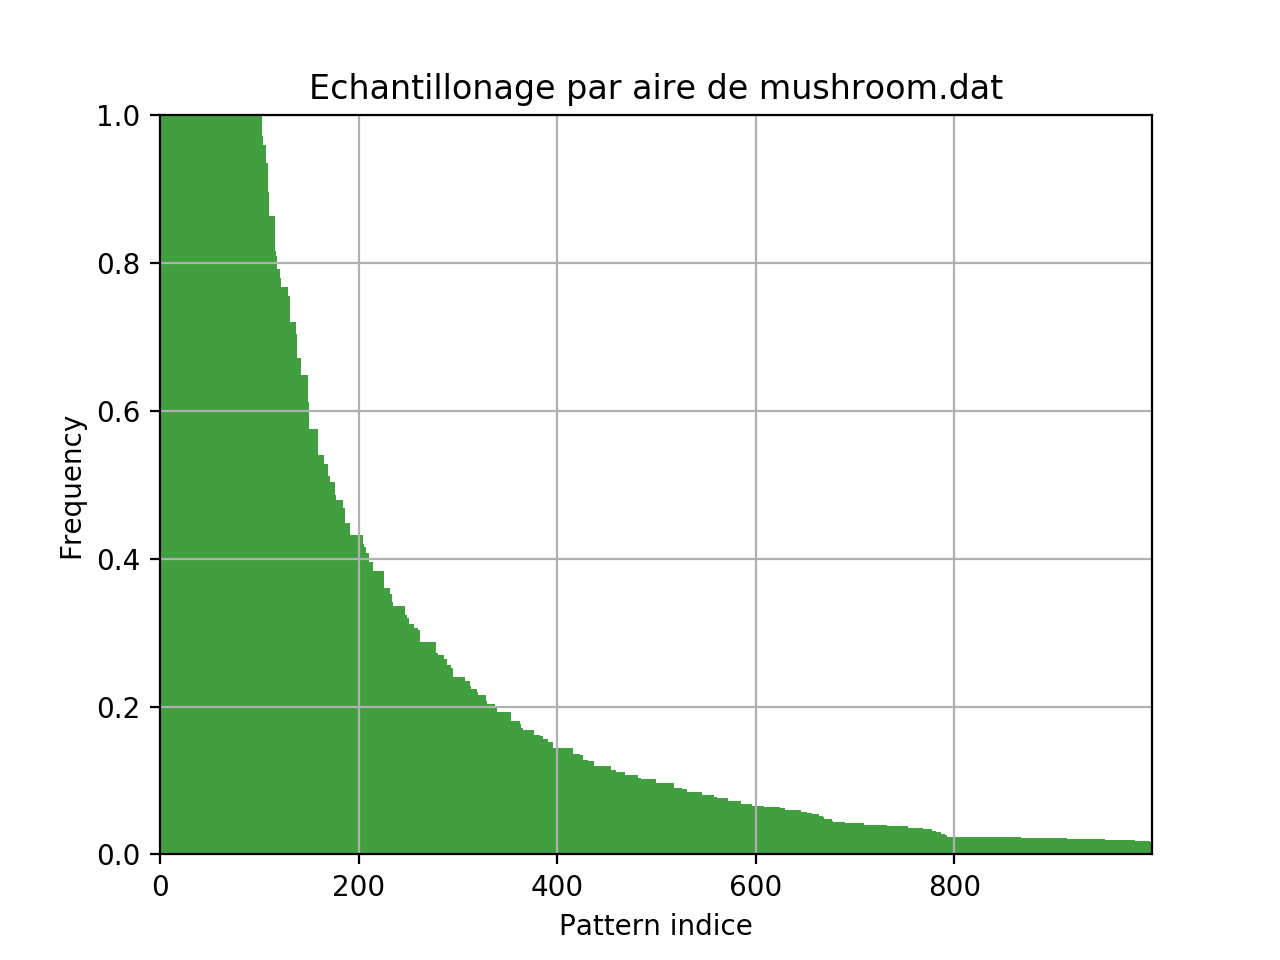

<IPython.core.display.Javascript object>


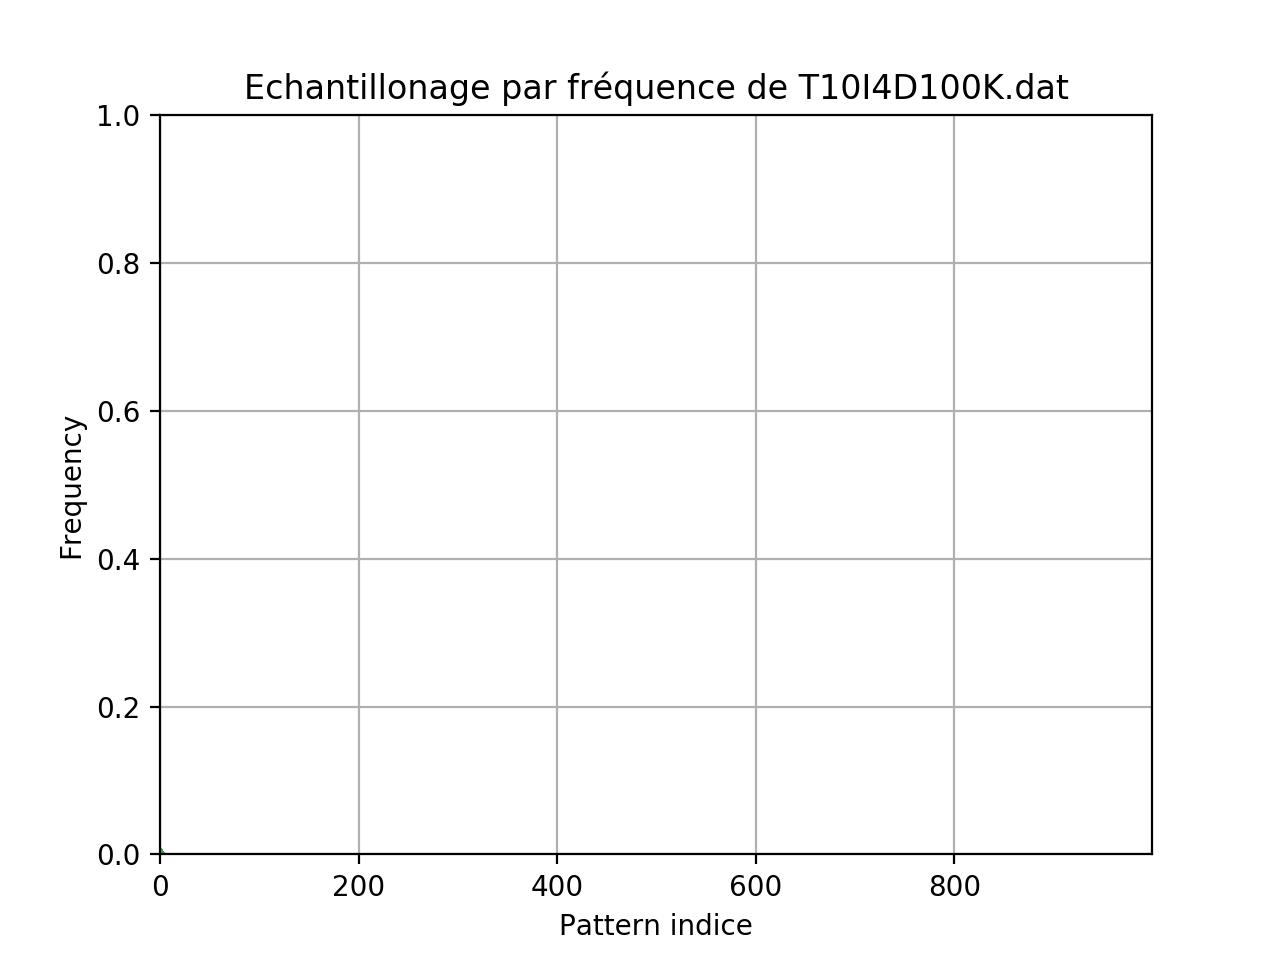

<IPython.core.display.Javascript object>


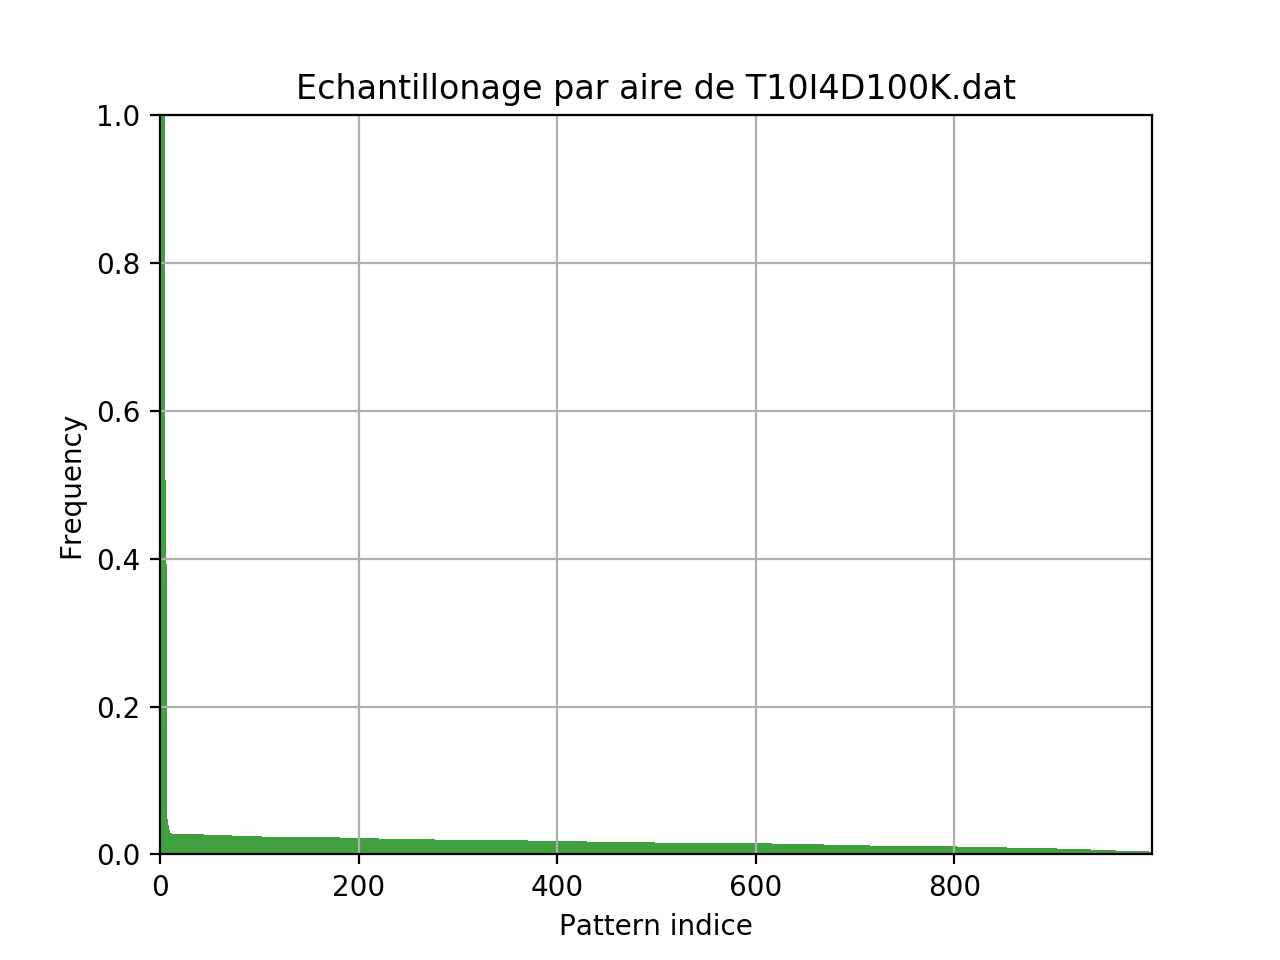

<IPython.core.display.Javascript object>


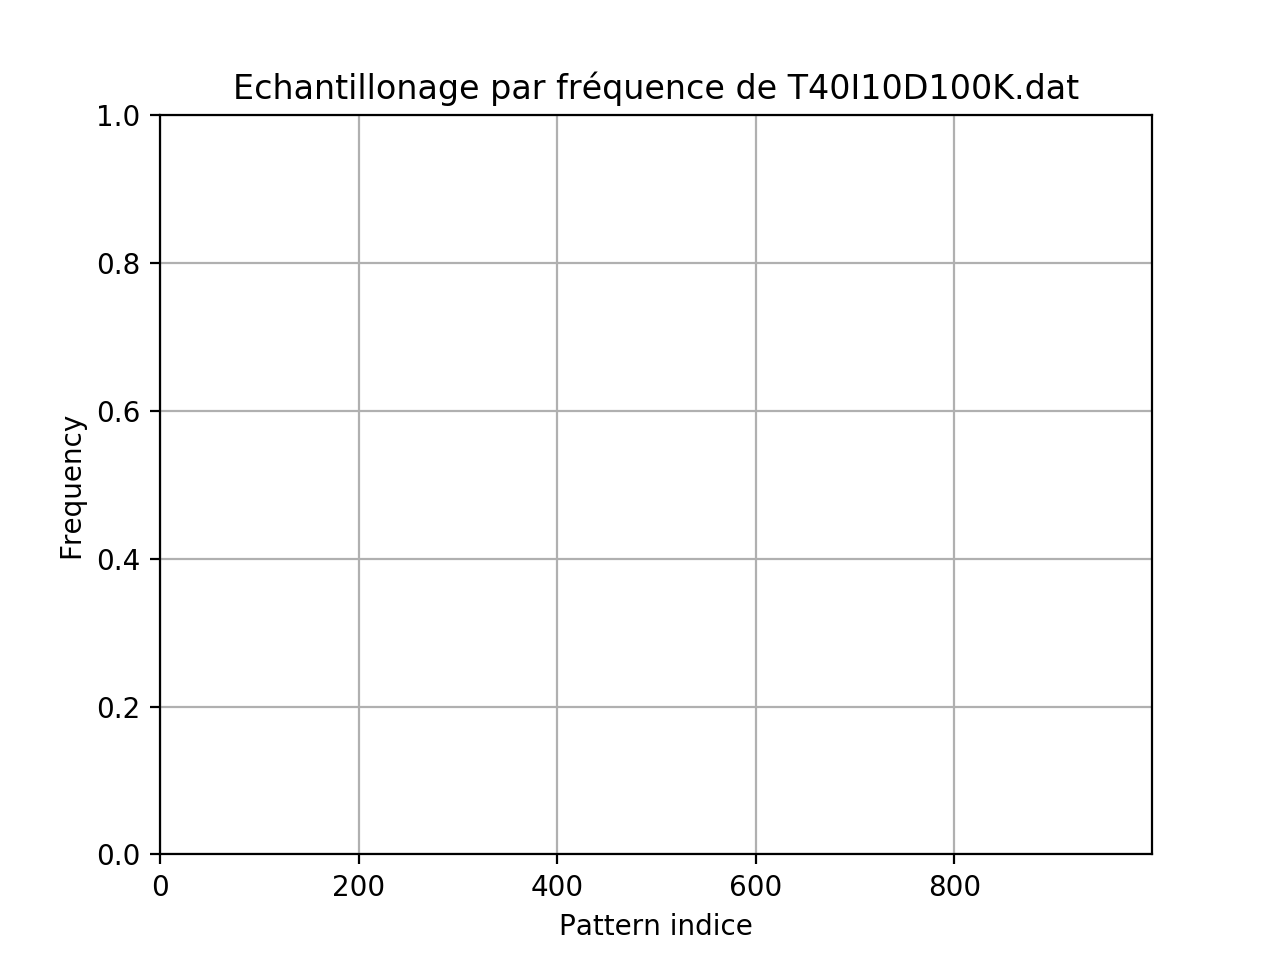

<IPython.core.display.Javascript object>


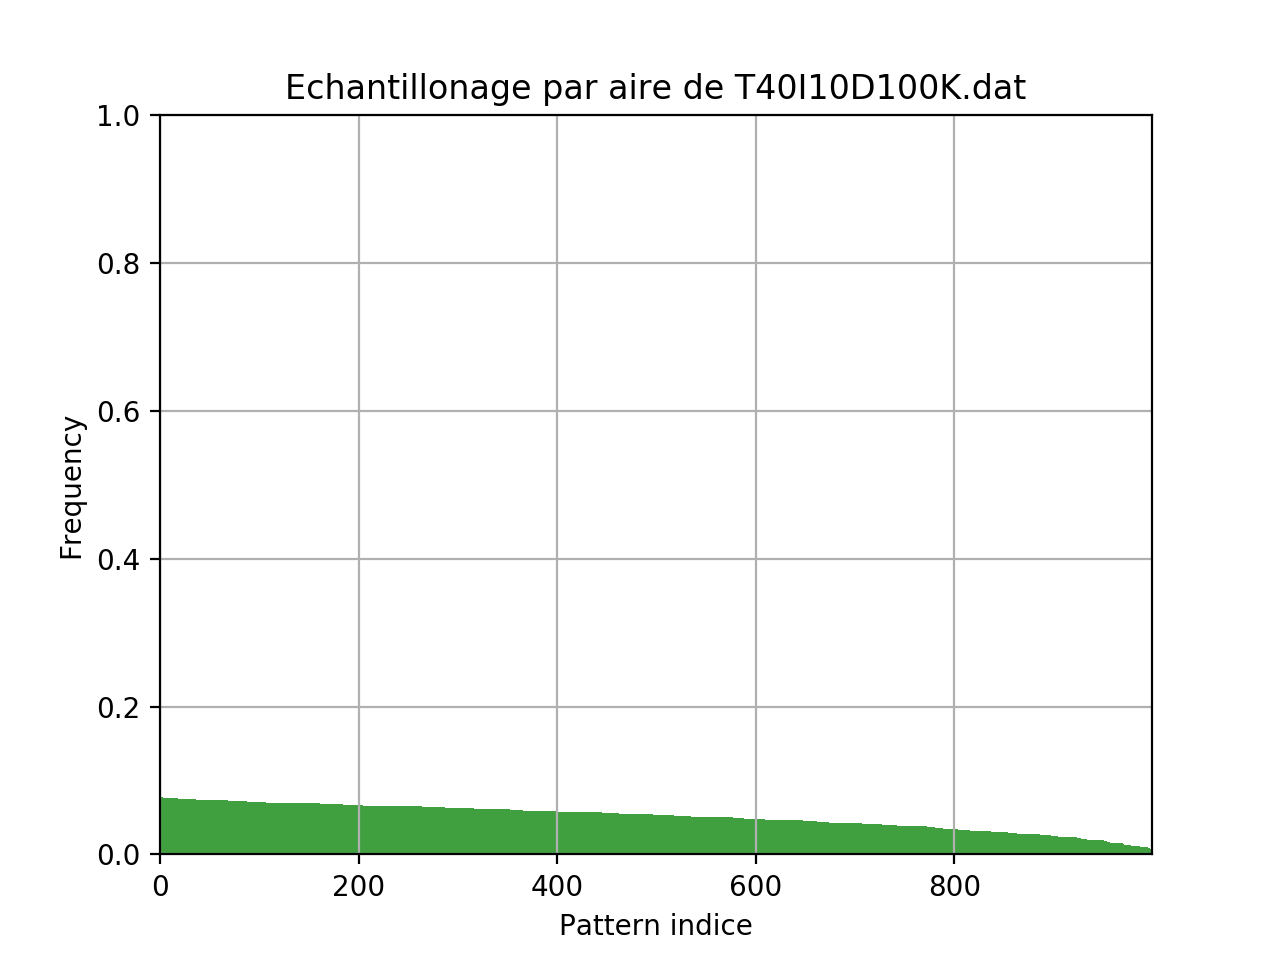

<IPython.core.display.Javascript object>


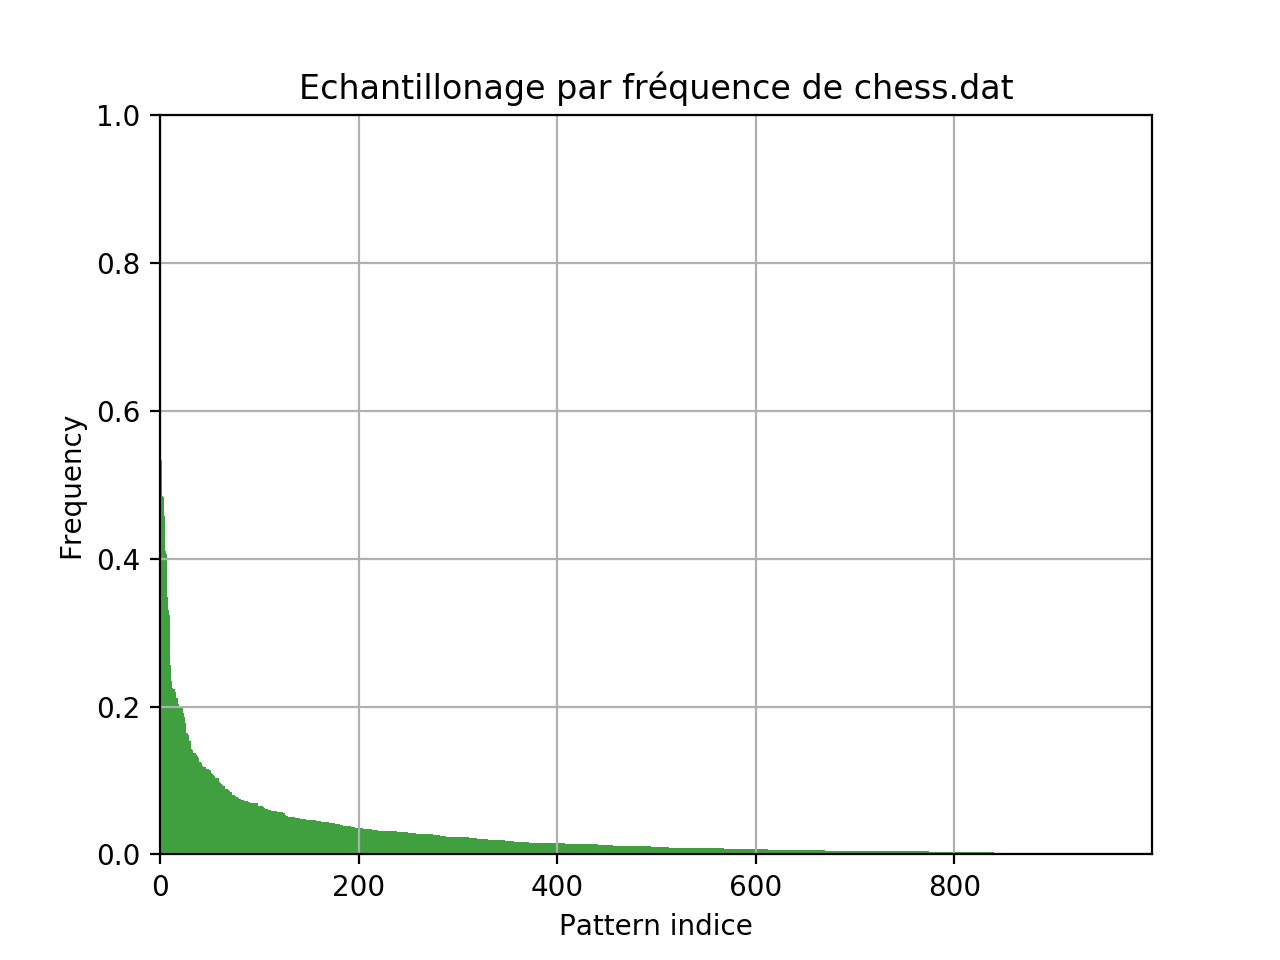

<IPython.core.display.Javascript object>


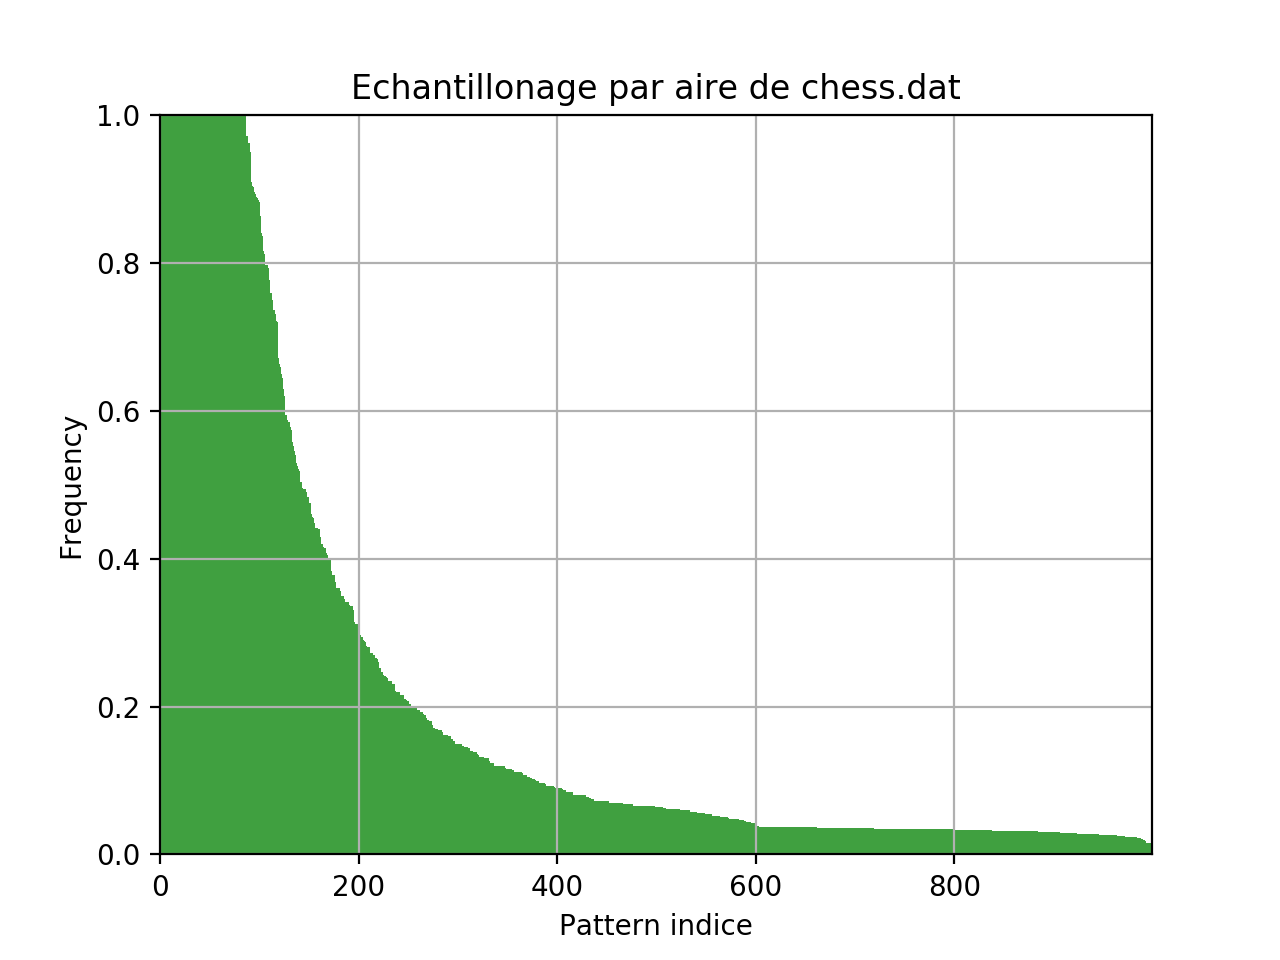

<IPython.core.display.Javascript object>


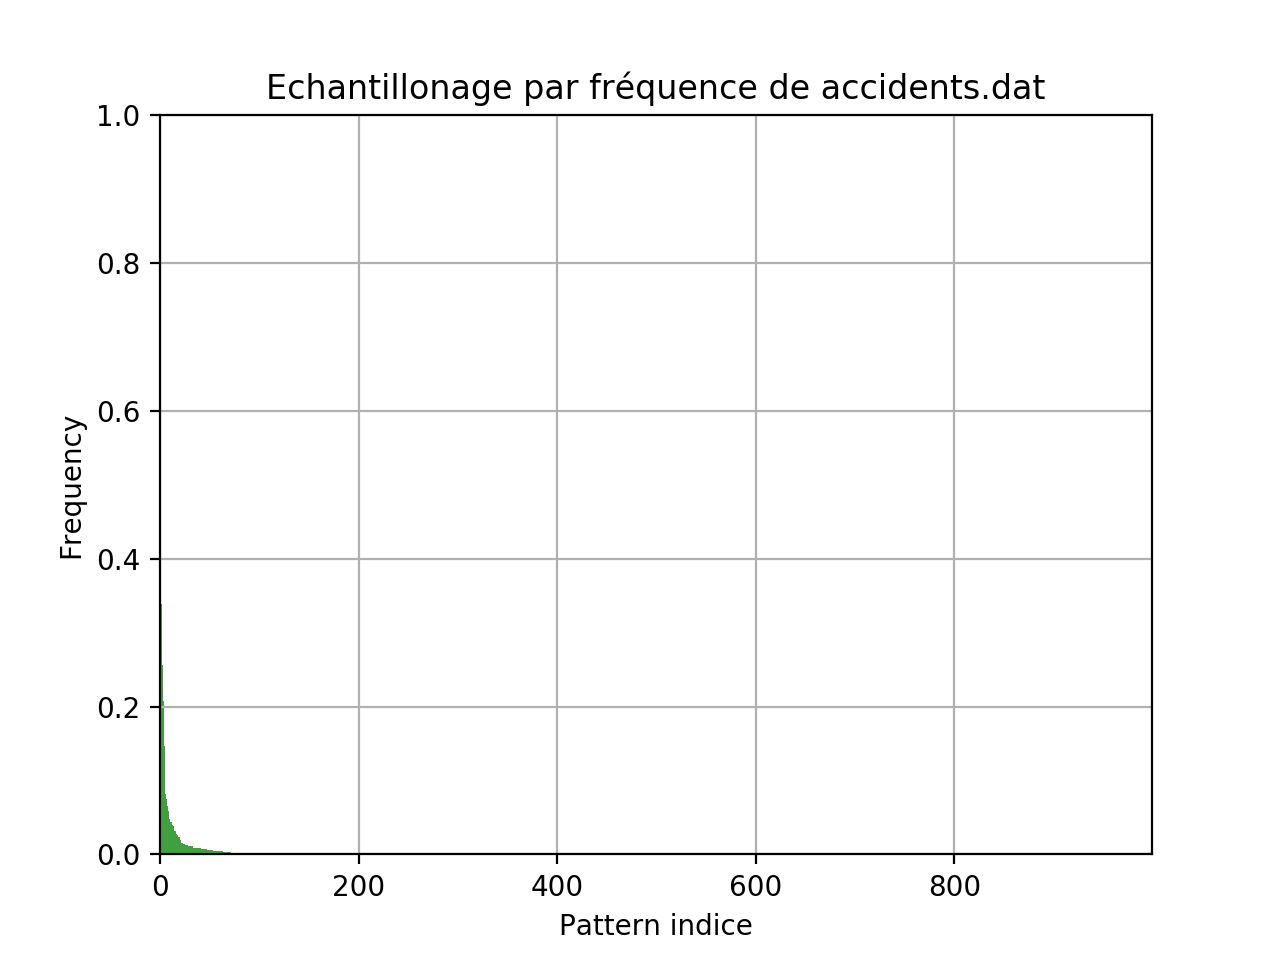

<IPython.core.display.Javascript object>


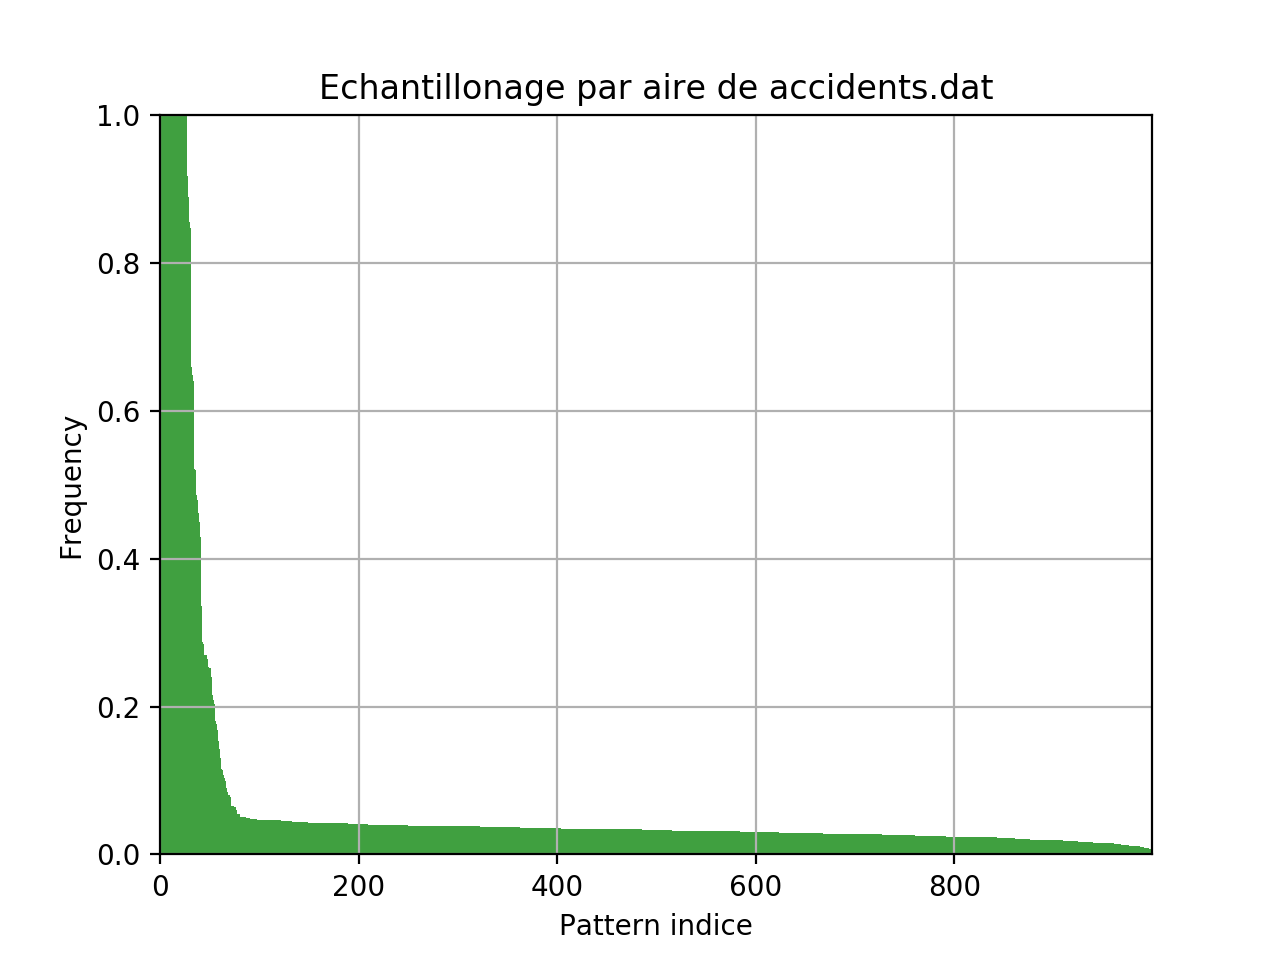

In [23]:
from matplotlib import pyplot as plt
import math
%matplotlib notebook
sets = np.array(["mushroom.dat", "T10I4D100K.dat", "T40I10D100K.dat", "chess.dat", "accidents.dat"])
for s in range(sets.size):
    D = DataSet(sets[s])
    freq = D.getRealisationsFreq(1000)
    freq = sorted(freq, key=lambda l:l[1], reverse=True)
    showPlot(freq, 0, s)    
    area = D.getRealisationsArea(1000)
    area = sorted(area, key=lambda l:l[1], reverse=True)
    showPlot(area, 1, s)
   

# Question 6 : évaluer la diversité de k tirages.

On calcule la moyenne des indices Jaccard avec la fonction patternSimilarity (dans la class DataSet) pour chaque couple de motif. On obtient un résultat qui est satisfant, indiquant des patterns assez différents.

In [21]:
patterns_freq = D.getRealisationsFreq(1000)
print(D.patternSimilarity(patterns_freq))

0.1121322064036602


# Question 7

Dans le but de vérifier que la probabilité de tirer un motif est proportionel à sa fréquence, on a décider de compter le nombre de fois qu'un motif est tiré et de le comparer à sa fréquence.
Pour ce faire nous avons choisi de représenter ces points dans un nuage de point et de voir si on peut trouver une fonction linéaire permettant d'approcher la fonction.

In [22]:
les = DataSet("mushroom.dat")
tup = {}
for it in range(100):
    freq = D.getRealisationsFreq(1000)
    freq = tuple(freq)
    for f in freq:
        if repr(f[0]) in tup:
            tup[repr(f[0])][0] += 1
        elif repr(f[0]) not in tup:
            tup[repr(f[0])] = (1, f[1])
print(tup)

KeyboardInterrupt: 